In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
dataset = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/5_MLR/50_Startups.csv")

In [3]:
dataset.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dataset.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
dataset.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0.5, 1.0, "Q-Q plot of 'Administration'")

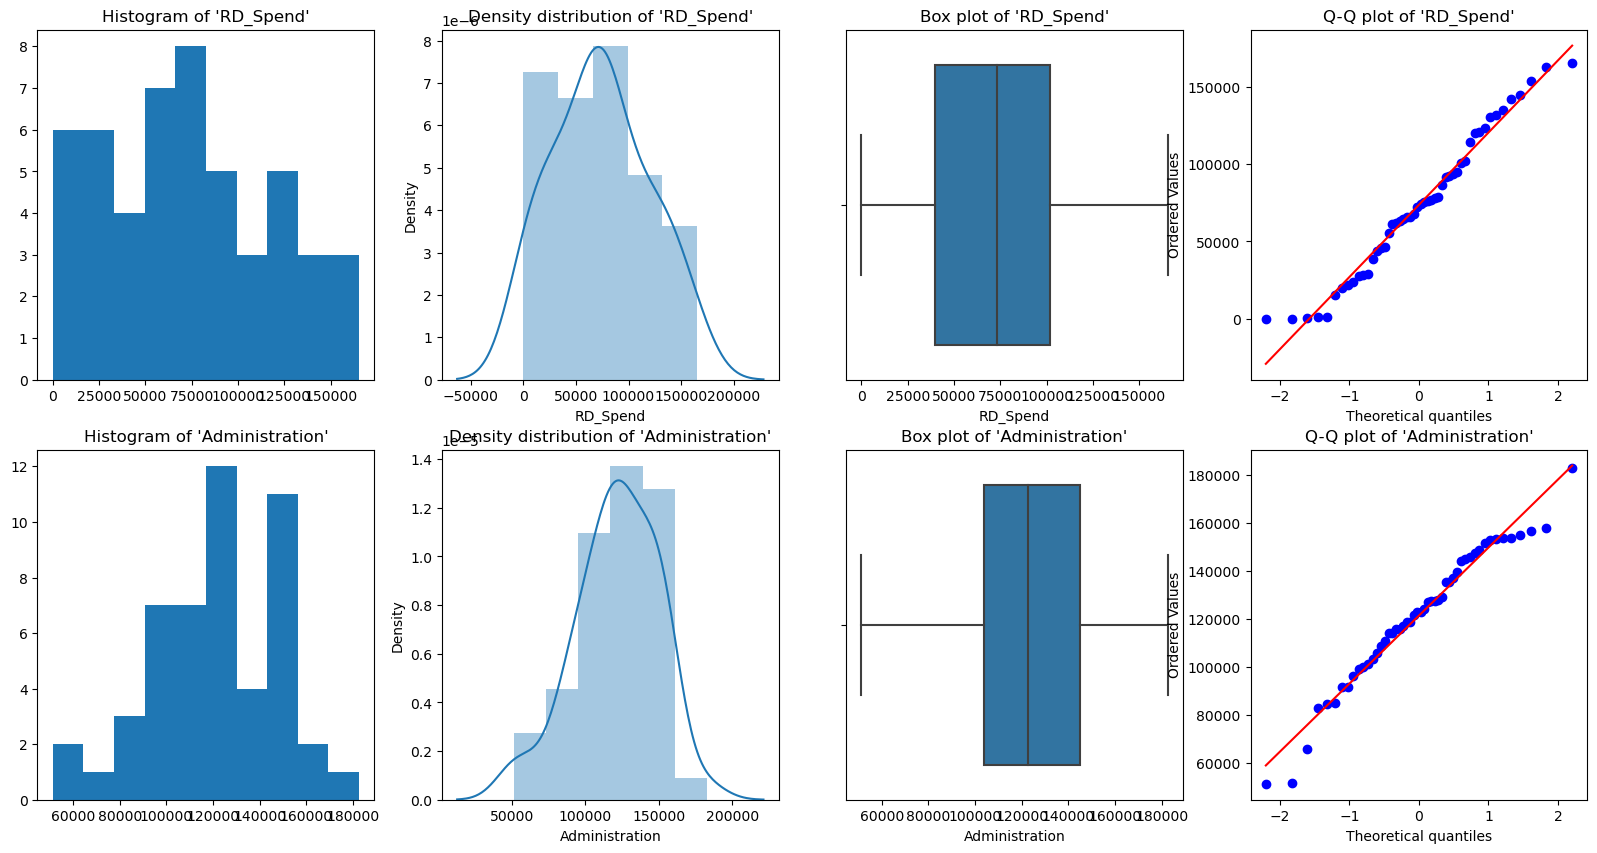

In [7]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['RD_Spend'], density=False)
plt.title("Histogram of 'RD_Spend'")
plt.subplot(2,4,5)
plt.hist(dataset['Administration'], density=False)
plt.title("Histogram of 'Administration'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['RD_Spend'], kde=True)
plt.title("Density distribution of 'RD_Spend'")
plt.subplot(2,4,6)
sns.distplot(dataset['Administration'], kde=True)
plt.title("Density distribution of 'Administration'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['RD_Spend'])
plt.title("Box plot of 'RD_Spend'")
plt.subplot(2,4,7)
sns.boxplot(dataset['Administration'])
plt.title("Box plot of 'Administration'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['RD_Spend'], plot=plt)
plt.title("Q-Q plot of 'RD_Spend'")
plt.subplot(2,4,8)
probplot(dataset['Administration'], plot=plt)
plt.title("Q-Q plot of 'Administration'")

Text(0.5, 1.0, "Q-Q plot of 'Profit'")

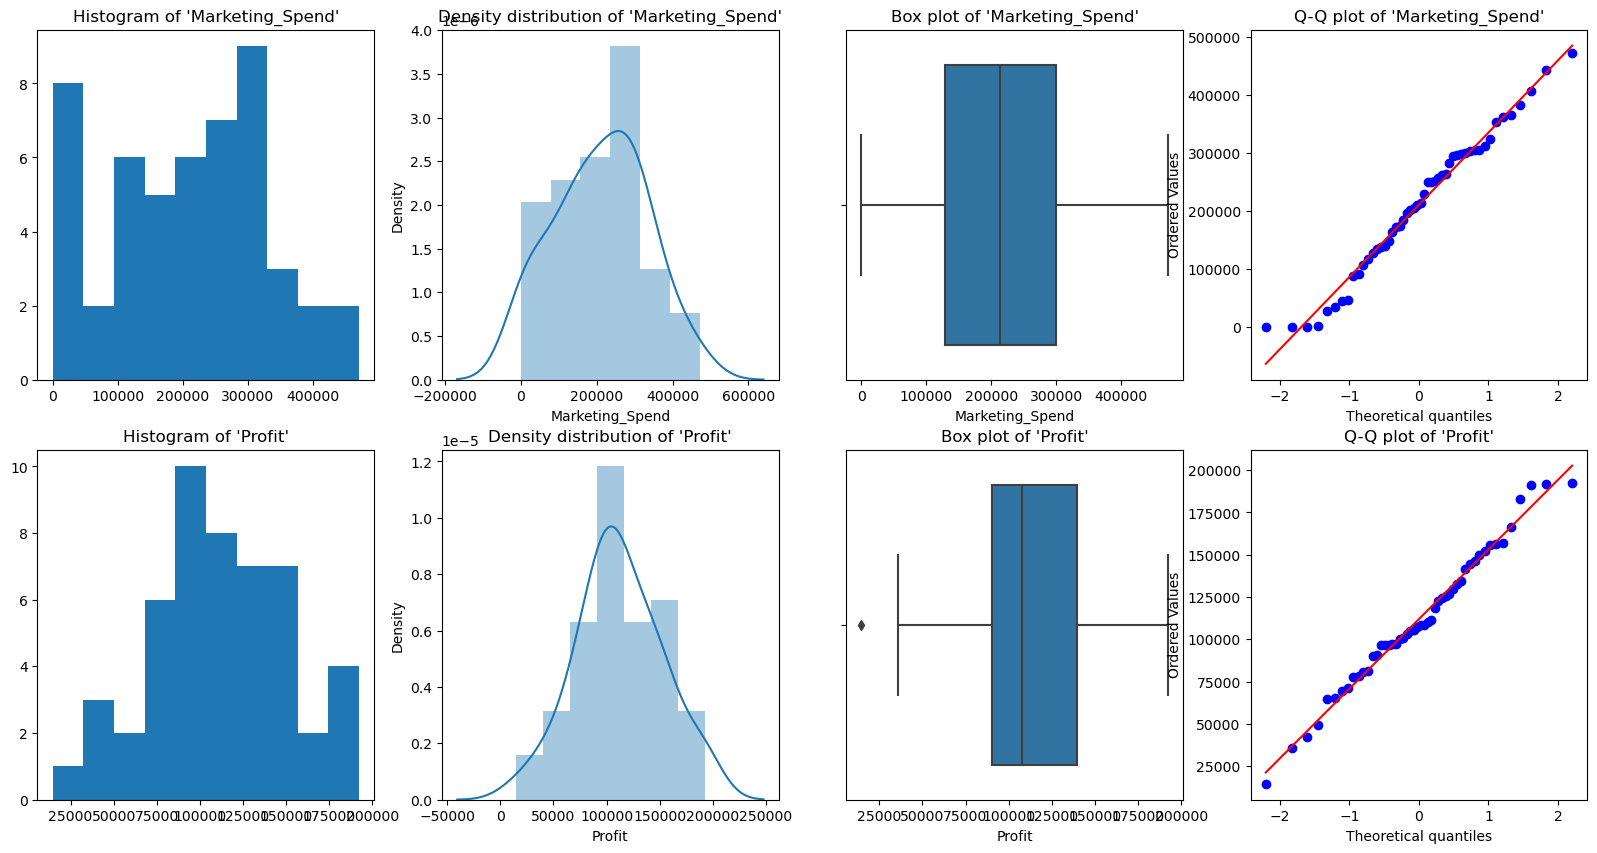

In [8]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Marketing_Spend'], density=False)
plt.title("Histogram of 'Marketing_Spend'")
plt.subplot(2,4,5)
plt.hist(dataset['Profit'], density=False)
plt.title("Histogram of 'Profit'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Marketing_Spend'], kde=True)
plt.title("Density distribution of 'Marketing_Spend'")
plt.subplot(2,4,6)
sns.distplot(dataset['Profit'], kde=True)
plt.title("Density distribution of 'Profit'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['Marketing_Spend'])
plt.title("Box plot of 'Marketing_Spend'")
plt.subplot(2,4,7)
sns.boxplot(dataset['Profit'])
plt.title("Box plot of 'Profit'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Marketing_Spend'], plot=plt)
plt.title("Q-Q plot of 'Marketing_Spend'")
plt.subplot(2,4,8)
probplot(dataset['Profit'], plot=plt)
plt.title("Q-Q plot of 'Profit'")

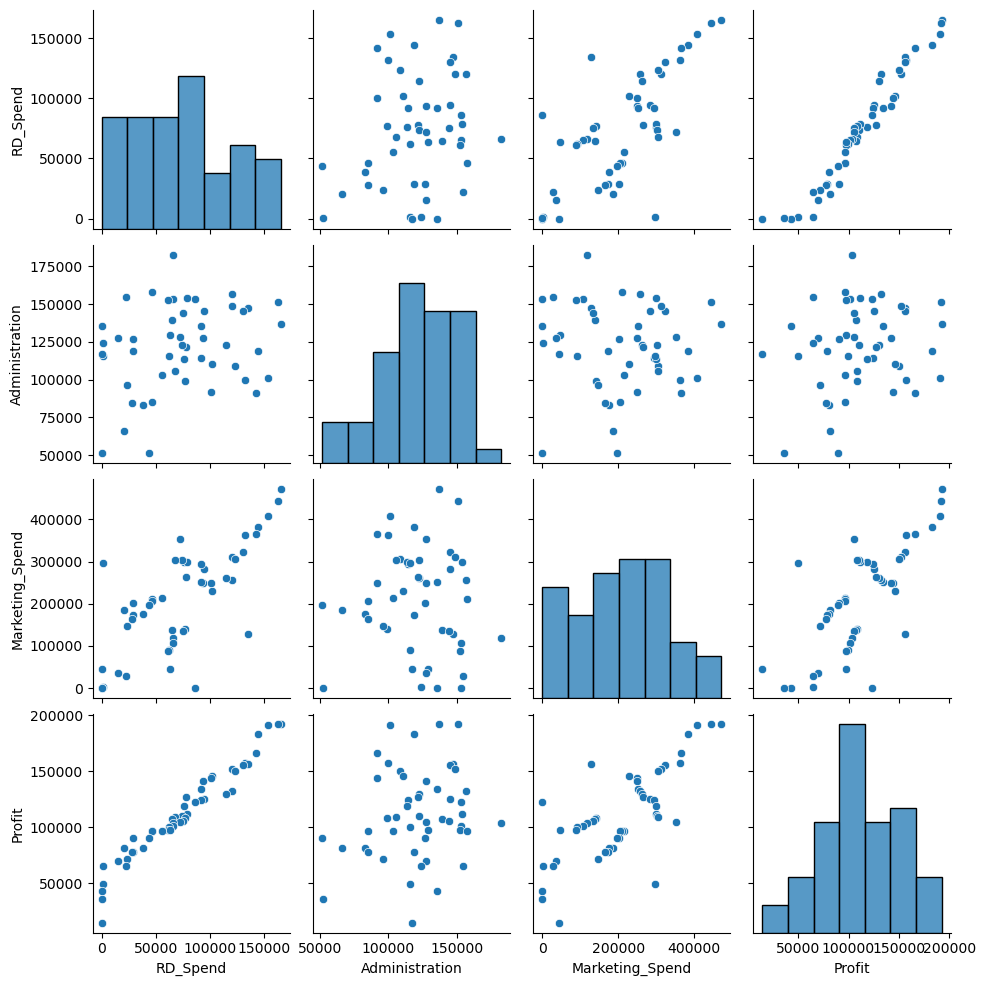

In [9]:
sns.pairplot(dataset)

In [10]:
## correlation
print("Correlation between variables: ")
dataset.corr()


Correlation between variables: 


,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


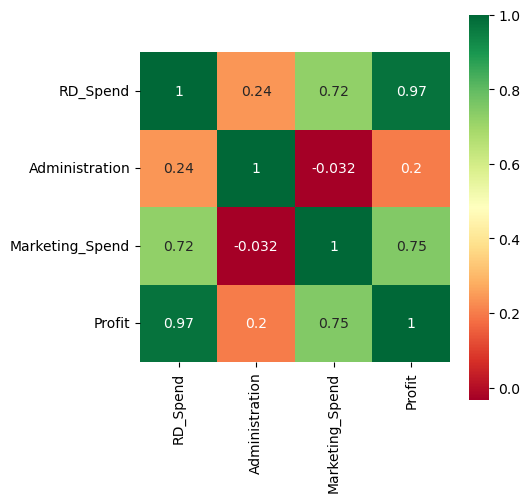

In [11]:
# Plotting the heatmap
plt.figure(figsize=(5,5)) 
sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  
plt.show()

In [12]:
#data transformation
# dataset_log = np.log(dataset[['RD_Spend','Administration', 'Marketing_Spend', 'Profit']])#log transformation
# dataset_log.insert(loc = 3,column = 'State', value = dataset['State'])

# dataset_sqr = np.square(dataset[['RD_Spend','Administration', 'Marketing_Spend', 'Profit']])#square transformation
# dataset_sqr.insert(loc = 3,column = 'State', value = dataset['State'])

dataset_sqrt = np.sqrt(dataset[['RD_Spend','Administration', 'Marketing_Spend', 'Profit']])#square root transformation
dataset_sqrt.insert(loc = 3,column = 'State', value = dataset['State'])

dataset_cbrt = np.cbrt(dataset[['RD_Spend','Administration', 'Marketing_Spend', 'Profit']])#cube root transformaton
dataset_cbrt.insert(loc = 3,column = 'State', value = dataset['State'])

# dataset_exp = np.exp(dataset[['RD_Spend','Administration', 'Marketing_Spend', 'Profit']])#exponential transformation
# dataset_exp.insert(loc = 3,column = 'State', value = dataset['State'])

In [13]:
def linearity(y_test,y_pred):
    
    ## 1))Assumption 1: Linearity check
    ##Checking with a scatter plot of actual vs. predicted-->Predictions should follow the diagonal line

    plt.subplots(figsize=(4, 2))
    plt.scatter(x=y_test, y=y_pred, alpha=0.5)

    # Plotting the diagonal line
    line_coords = np.arange(y_test.min().min(), y_pred.max().max())
    plt.plot(line_coords, line_coords,  
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


In [14]:
def normality(residuals):
    mean_residuals = np.mean(residuals)
    print("Mean of Residuals {}".format(mean_residuals))
    
    ## 2))Assumption 2: Normality of residuals or errors
    from statsmodels.stats.diagnostic import normal_ad
    # the Anderson-Darling test
    # p-value from the test - below 0.05 generally means non-normal

    p_value = normal_ad(residuals)[1]
    if p_value < 0.05:
        print('Residuals are not normally distributed and assumption not satisfied')
    else:
        print('Residuals are normally distributed and hence Assumption satisfied')

    # Plotting the residuals distribution
    plt.subplots(figsize=(4, 2))
    plt.title('Distribution of Residuals')
    sns.distplot(residuals)
    plt.show()
    


In [15]:
def autocorrelation(residuals):
    ## 3))Assumption 3: Autocorrelation check
    from statsmodels.stats.stattools import durbin_watson

    # Performing Durbin-Watson Test
    # Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
    # 0 to 2< is positive autocorrelation
    # >2 to 4 is negative autocorrelation

    durbinWatson = durbin_watson(residuals)
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation and hence Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation and hence Assumption not satisfied')
    else:
        print('Little to no autocorrelation and hence Assumption satisfied')



In [16]:
def homoscedasticity(y_test,y_pred,residuals):

    ## 4))Assumption 4: Check for Homoscedasticity
    #bartlett test
    from scipy.stats import bartlett
    test = bartlett( y_test,residuals)[1]
    print("p_value: ",test)
    if test<0.05:
        print('Error terms are not homoscedastic and hence Assumption not satisfied')
    else:
        print('Error terms are homoscedastic and hence Assumption satisfied')

    plt.subplots(figsize=(6, 4))
    plt.scatter(x=y_pred, y=residuals, alpha=0.5)
    plt.plot(np.repeat(0,175000), color='darkorange', linestyle='--')
    plt.xlabel('y_pred/predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs fitted values plot for homoscedasticity check')
    plt.show()  
    


In [17]:
def Multicollinearity(dataset):  
    # 5))Assumption 5: Little to no multicollinearity among predictors
    dataset_X=dataset.drop(['Profit'],axis=1)
    dataset_X.head()

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # Plotting the heatmap
#     plt.figure(figsize=(5,5)) 
#     sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  
#     plt.show()

    # Variance Inflation Factors (VIF)
    # > 10: An indication that multicollinearity may be present
    # > 100: Certain multicollinearity among the variables
    # print(dataset_X)

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(dataset_X.values, i) for i in range(dataset_X.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(dataset_X.columns[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Little or no multicollinearity among predictors , hence Assumption satisfied')
        else:
            print('Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)')
        


In [18]:
def model(dataset):
    dataset=pd.get_dummies(dataset,columns=['State'])
    dataset = dataset[[col for col in dataset.columns if col != "Profit"] + ["Profit"]]
    #print(dataset.columns.values)

    X = dataset.iloc[:,:-1].values # independant variables
    y = dataset.iloc[:,-1].values ## dependant variable  
    
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=0)
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score

    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
    rsquare = r2_score(y_true=y_test, y_pred=y_pred)

    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    print("Rsquare:", rsquare)
    
    residuals = y_test-y_pred
    
    linearity(y_test,y_pred)
    normality(residuals)
    autocorrelation(residuals)
    homoscedasticity(y_test,y_pred,residuals)
    Multicollinearity(dataset)
    
# model(dataset)


In [19]:
def smf_ols(dataset):
    dataset=pd.get_dummies(dataset,columns=['State'])
    dataset = dataset[[col for col in dataset.columns if col != "Profit"] + ["Profit"]]
    dataset = dataset.rename(columns = {"State_New York":"State_New_York"})
    x = dataset.iloc[:,:-1] # independent variables
    y = dataset.iloc[:,-1] # dependent varible
    #print(X)
    model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York', data=dataset).fit()
    print(model.summary())
    
    fig = sm.graphics.influence_plot(model, criterion="cooks")
    fig.tight_layout(pad=1.0)
    
    model_cooksd = model.get_influence().cooks_distance[0]

    # get length of df to obtain n
    n = len(dataset["Profit"])

    # calculate critical d
    critical_d = 4/n
    print('\n\nCritical Cooks distance:', critical_d)

    # identification of potential outliers with leverage
    out_d = model_cooksd > critical_d

    # output potential outliers with leverage
    print(dataset.index[out_d], "\n", 
        model_cooksd[out_d])
    
    subset = ~dataset.index.isin(dataset.index[out_d])

    print(dataset.index, "\n", subset)
    
    model_cook = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_New_York", data=dataset, subset=subset).fit()

    print(model_cook.summary())
# smf_ols(dataset)

Model without transformation
MAE: 6520.697183079723
MSE: 61903144.40236708
RMSE: 7867.855133539704
MAPE: 0.05823736270739394
Rsquare: 0.9358680970046517


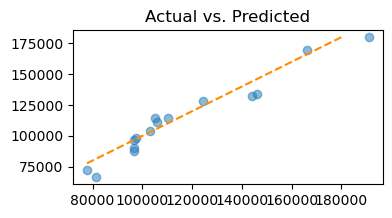

Mean of Residuals 2819.3698555957485
Residuals are normally distributed and hence Assumption satisfied


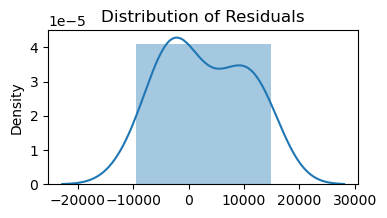

Durbin-Watson: 2.1773196696884316
Little to no autocorrelation and hence Assumption satisfied
p_value:  3.1571424828871035e-06
Error terms are not homoscedastic and hence Assumption not satisfied


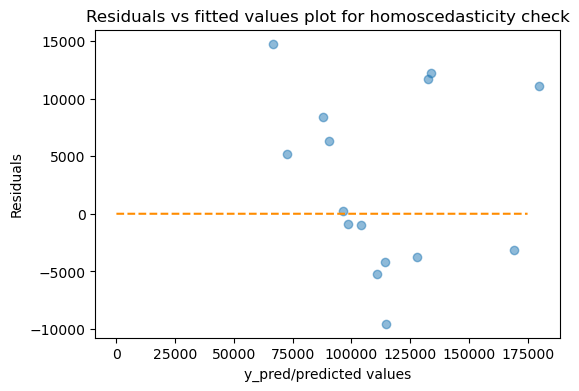

RD_Spend: 2.4955109215494433
Administration: 1.177766050899384
Marketing_Spend: 2.4167967566863933
State_California: 9.044051986598609
State_Florida: 9.44357838439795
State_New York: 9.222969024865256

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Little or no multicollinearity among predictors , hence Assumption satisfied


In [20]:
print("Model without transformation")
model(dataset)     

Square root transformed model
MAE: 12.690199312969783
MSE: 218.3645224267194
RMSE: 14.777162191257135
MAPE: 0.03702205492142677
Rsquare: 0.8847719034154328


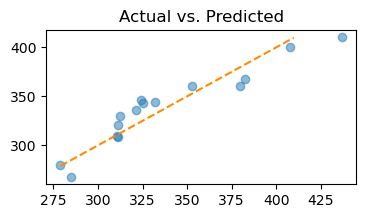

Mean of Residuals -0.9800548129403599
Residuals are normally distributed and hence Assumption satisfied


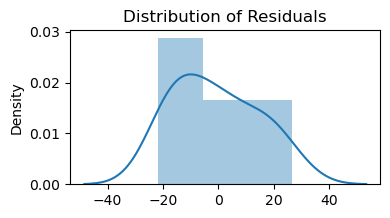

Durbin-Watson: 2.739676964137648
Signs of negative autocorrelation and hence Assumption not satisfied
p_value:  0.0002430040507582046
Error terms are not homoscedastic and hence Assumption not satisfied


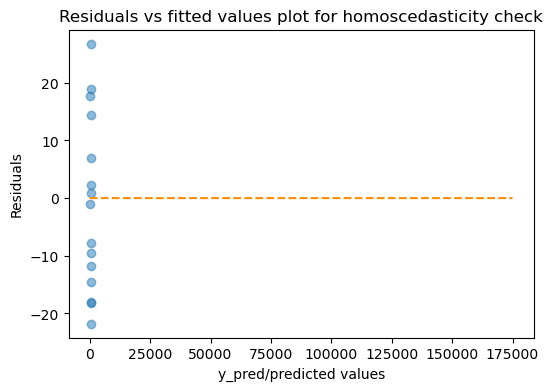

RD_Spend: 2.265333128008625
Administration: 1.1659907591650913
Marketing_Spend: 2.1919110429579964
State_California: 28.021121892850523
State_Florida: 27.750769106577792
State_New York: 27.6021512473658

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [21]:
print("Square root transformed model")
model(dataset_sqrt)


Cube root transformed model
MAE: 1.607886452561732
MSE: 3.3514118210174764
RMSE: 1.8306861612568868
MAPE: 0.032658217829360625
Rsquare: 0.8011674645574025


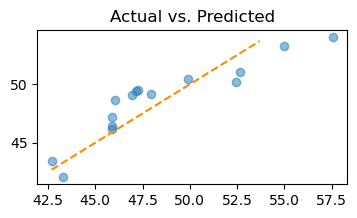

Mean of Residuals -0.22787194586653545
Residuals are normally distributed and hence Assumption satisfied


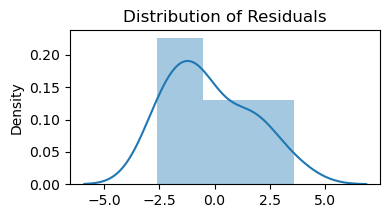

Durbin-Watson: 2.606809034859477
Signs of negative autocorrelation and hence Assumption not satisfied
p_value:  0.004330915867965354
Error terms are not homoscedastic and hence Assumption not satisfied


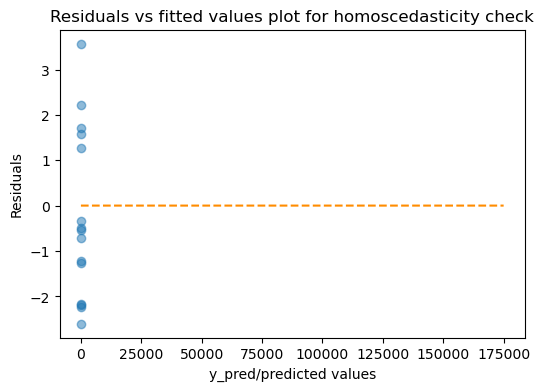

RD_Spend: 2.1209911542893063
Administration: 1.120603570435943
Marketing_Spend: 2.0728147080461072
State_California: 55.634459829839415
State_Florida: 53.81646845266514
State_New York: 54.72389319224924

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [22]:
print("\nCube root transformed model")
model(dataset_cbrt)

Model without transformation
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.34e-27
Time:                        12:05:27   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

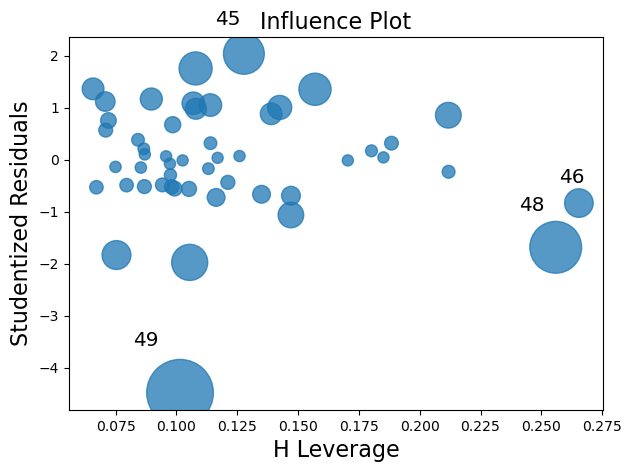

In [23]:
print("Model without transformation")
smf_ols(dataset)     

Square root transformed model
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.98e-24
Time:                        12:05:27   Log-Likelihood:                -212.12
No. Observations:                  50   AIC:                             436.2
Df Residuals:                      44   BIC:                             447.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

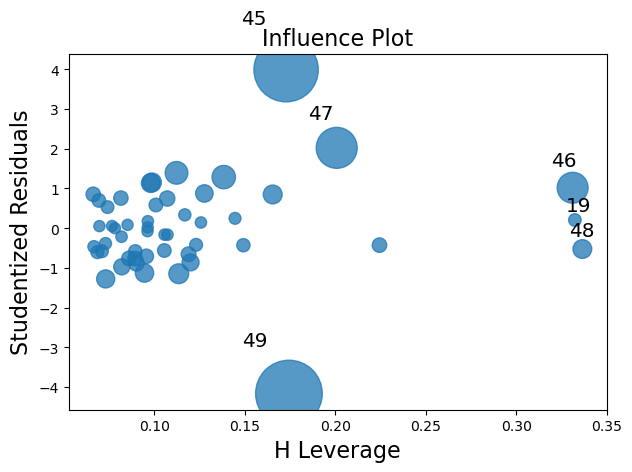

In [24]:
print("Square root transformed model")
smf_ols(dataset_sqrt)


Cube root transformed model
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           8.91e-22
Time:                        12:05:27   Log-Likelihood:                -104.23
No. Observations:                  50   AIC:                             220.5
Df Residuals:                      44   BIC:                             231.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

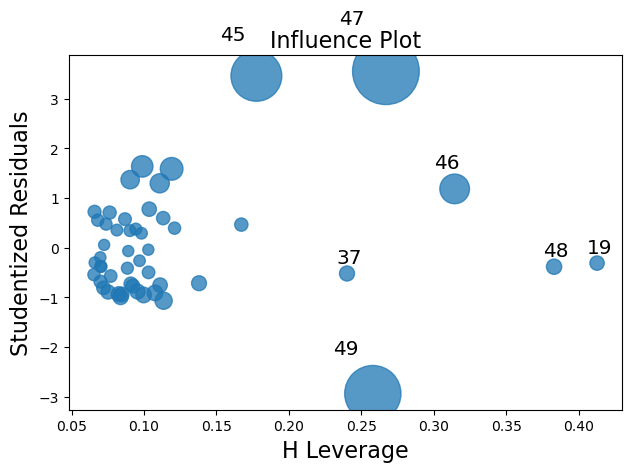

In [25]:
print("\nCube root transformed model")
smf_ols(dataset_cbrt)

## Model without transformation using smf_ols is  giving best R square value after model diagnostics by applying cook's distance, hence this model can be used for prediction of profit